<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="1000" alt="cognitiveclass.ai logo"  />
</center>

# Assignment: Exploratory Data Analysis with tidyverse and ggplot2

Estimated time needed: 60 minutes

# Introduction and Objectives

In this Lab, you will use an R notebook to perform exploratory data analysis using tidyverse and the ggplot2 R packages.

You will start by doing some minor data preparation on the SEOUL BIKE SHARING dataset. Then you will generate and explore some statistics from the resulting dataframe and make some observations. Finally, you will generate some informative plots using the ggplot2 library.

Your primary objective is to gather insights from your exploratory analysis. These findings will be part of your story that you will create your final capstone presentation.

Visualization is a very powerful tool for better understanding your data and finding patterns that may exist in it. You can use scatterplots, for example, to display how well two features are correlated with, or similar to each other.  When data are highly correlated, it means they vary in similar ways, and so their graphs will look similar (once scaled to a common scale). We can say one variable 'explains' the variation in the other, and that they are 'covariates'. There could be a causal relationship between covariates, meaning that changing one variable has the effect of changing the other, but this need not be the case. Perhaps there is another factor which causes both covariates to respond to variations, or the similarity could be a random coincidence. Either way, the behaviour of one variable can be used to predict the behaviour of the other. The key practical difference is that in the causal case, if we can influence the first variable then we can have a corresponding causal influence on the second. Like turning a light switch on or off to control the light in the room, the state of the switch controls the state of the light bulb. This is an important topic for data science that is beyond our current scope, but we invite you to delve deeper into the subject as you progress in your career$.^{1}$

Other ways visualization can inform your analysis is with spotting outliers and anomalous behaviour in your features. Boxplots are informative in these regards. You can also gain insights about any clear trends and anomalies that may be present in a variable, simply by plotting it directly. For instance, time series and spatial data are particularly interesting kinds of variables. Outliers can easily consume the range of your plot though, making your data look like a featureless flat line in comparison to these points. So some cleaning, namely outlier removal, may be required to get a clearer picture.

A word of caution: be skeptical about any patterns you find, especially in smaller datasets. In very simple terms, it is true that any two points randomly placed in space always define a unique line; but add a third random point, and it is very unlikely that it will land on that same line. This suggests one of the main advantages of 'big data' - any patterns that emerge in very large datasets are far more likely to persist on unseen data than those found in small datasets.

All right, let's move along and get started with our exploratory analysis!


### For reference, we include the Attribute Information for the `seoul_bike_sharing` dataset:

*   DATE - format: "2017-12-01"
*   RENTED_BIKE_COUNT - Count of bikes rented at each hour
*   HOUR - Hour of the day
*   TEMPERATURE - Celsius
*   HUMIDITY - %
*   Windspeed - m/s
*   VISIBILITY - 10m
*   DEW_POINT_TEMPERATURE - Celsius
*   SOLAR_RADIATION - MJ/m2
*   RAINFALL - mm
*   SNOWFALL - cm
*   SEASONS -  "Autumn","Spring",..
*   HOLIDAY - "Holiday", "No holiday"
*   FUNCTIONING_DAY - "Yes", "No"


## Load the seoul_bike_sharing data into a dataframe

Use the following URL to load your dataset.\
The dataset is already clean, but you will still need to pay careful attention to data types, especially dates, which you may need to coerce.
Also, ensure any categorical variables get typed as factors.

```R
seoul_bike_sharing <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv"  

```


### Task 1 - Load the dataset

Ensure you read `DATE` as type `character`.

### Solution 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("seoul_bike_sharing_clean.csv", parse_dates=["DATE"])

In [3]:
df

,DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
0,2017-01-12,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,2018-11-30,1003,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,Autumn,No Holiday,Yes
8461,2018-11-30,764,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8462,2018-11-30,694,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8463,2018-11-30,712,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,Autumn,No Holiday,Yes


### Task 2 - Recast `DATE` as a date

Use the format of the data, namely "%d/%m/%Y".

### Solution 2


In [4]:
df["DATE"] = df["DATE"].dt.strftime("%d/%m/%Y")

In [5]:
df

,DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
0,12/01/2017,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,12/01/2017,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,12/01/2017,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,12/01/2017,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,12/01/2017,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,30/11/2018,1003,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,Autumn,No Holiday,Yes
8461,30/11/2018,764,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8462,30/11/2018,694,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8463,30/11/2018,712,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,Autumn,No Holiday,Yes


### Task 3 - Cast `HOURS` as a categorical variable

Also, coerce its levels to be an ordered sequence.  This will ensure your visualizations correctly utilize `HOURS` as a discrete variable with the expected ordering.

### Solution 3


In [6]:
df["HOUR"] = df["HOUR"].astype("category")

### Check the structure of the dataframe


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   DATE                   8465 non-null   object  
 1   RENTED_BIKE_COUNT      8465 non-null   int64   
 2   HOUR                   8465 non-null   category
 3   TEMPERATURE            8465 non-null   float64 
 4   HUMIDITY               8465 non-null   int64   
 5   WIND_SPEED             8465 non-null   float64 
 6   VISIBILITY             8465 non-null   int64   
 7   DEW_POINT_TEMPERATURE  8465 non-null   float64 
 8   SOLAR_RADIATION        8465 non-null   float64 
 9   RAINFALL               8465 non-null   float64 
 10  SNOWFALL               8465 non-null   float64 
 11  SEASONS                8465 non-null   object  
 12  HOLIDAY                8465 non-null   object  
 13  FUNCTIONING_DAY        8465 non-null   object  
dtypes: category(1), float64(6), int64(3), ob

### Finally, ensure there are no missing values


In [8]:
df.isnull().sum()

DATE                     0
RENTED_BIKE_COUNT        0
HOUR                     0
TEMPERATURE              0
HUMIDITY                 0
WIND_SPEED               0
VISIBILITY               0
DEW_POINT_TEMPERATURE    0
SOLAR_RADIATION          0
RAINFALL                 0
SNOWFALL                 0
SEASONS                  0
HOLIDAY                  0
FUNCTIONING_DAY          0
dtype: int64

## Descriptive Statistics

Now you are all set to take a look at some high level statistics of the `seoul_bike_sharing` dataset.


### Task 4 - Dataset Summary

Use the base R `sumamry()` function to describe the `seoul_bike_sharing` dataset.

### Solution 4


In [9]:
df.describe(include="all")

,DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
count,8465,8465.00,8465.00,8465.00,8465.00,8465.00,8465.00,8465.00,8465.00,8465.00,8465.00,8465,8465,8465
unique,353,nan,24.00,nan,nan,nan,nan,nan,nan,nan,nan,4,2,1
top,27/12/2017,nan,23.00,nan,nan,nan,nan,nan,nan,nan,nan,Summer,No Holiday,Yes
freq,24,nan,353.00,nan,nan,nan,nan,nan,nan,nan,nan,2208,8057,8465
mean,NaN,729.16,nan,12.77,58.15,1.73,1433.87,3.94,0.57,0.15,0.08,NaN,NaN,NaN
std,NaN,642.35,nan,12.11,20.48,1.03,609.05,13.24,0.87,1.13,0.44,NaN,NaN,NaN
min,NaN,2.00,nan,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00,NaN,NaN,NaN
25%,NaN,214.00,nan,3.00,42.00,0.90,935.00,-5.10,0.00,0.00,0.00,NaN,NaN,NaN
50%,NaN,542.00,nan,13.50,57.00,1.50,1690.00,4.70,0.01,0.00,0.00,NaN,NaN,NaN
75%,NaN,1084.00,nan,22.70,74.00,2.30,2000.00,15.20,0.93,0.00,0.00,NaN,NaN,NaN


### Some Basic Observations:

*   We can see from `DATE` that we have exactly a full year of data.
*   No records have zero bike counts.
*   Spring and Winter have the same count of records, while autumn has the least and Summer has the most.
*   Temperature has a large range, so we might expect it to explain at least some of the variation in bike rentals.
*   Precipitation seems to be quite rare, only happening in the fourth quartiles for both `RAINFALL` and `SNOWFALL`.
*   The average `WINDSPEED` is very light at only 1.7 m/s, and even the maximum is only a moderate breeze (Google 'Beaufort Wind Scale' to find the different wind descriptions)

By now, you might agree that Exploratory Data Analysis can create more questions than answers. That's okay - you'll have a much deeper understanding and appreciation for your data as a result!

### Task 5 - Based on the above stats, calculate how many Holidays there are.

### Solution 5:


In [10]:
df["HOLIDAY"].value_counts()

No Holiday    8057
Holiday        408
Name: HOLIDAY, dtype: int64

### Task 6 - Calculate the percentage of records that fall on a holiday.

### Solution 6


In [11]:
round((408 / 8057) * 100 , 2)

5.06

### Task 7 - Given there is exactly a full year of data, determine how many records we expect to have.

### Solution 7


In [12]:
df.shape

(8465, 14)

### Task 8 - Given the observations for the 'FUNCTIONING_DAY' how many records must there be?

### Solution 8


In [13]:
df["FUNCTIONING_DAY"].value_counts()

Yes    8465
Name: FUNCTIONING_DAY, dtype: int64

## Drilling Down

Let's calculate some seasonally aggregated measures to help build some more context.

### Task 9 - Load the dplyr package, group the data by `SEASONS`, and use the `summarize()` function to calculate the seasonal total rainfall and snowfall.

### Solution 9


In [14]:
df.groupby("SEASONS")["RAINFALL","SNOWFALL"].sum()

,RAINFALL,SNOWFALL
SEASONS,,
Autumn,227.90,123.00
Spring,403.80,0.00
Summer,559.70,0.00
Winter,70.90,534.60


Wow, that seems like a lot of snow.\
Now that you have some ideas about what sorts of questions can be answered through descriptive statistics, let's start visualizing the data.


## Data Visualization

Let's take a closer look at our main variable of interest, namely, `RENTED_BIKE_COUNT`.\
Think of this variable as the key *measure* or *dependent variable* in your analysis.

Indeed, it is a measured quantity, and we expect it to depend on factors such as the expected weather.\
Evidently, if the immediate or forecasted weather is harsh or unpleasant, many people could choose to use alternate transit or simply wait for better weather rather than rent a bike.\
On the other hand, many people may be inspired to ride under pleasant expected weather conditions.

The weather is largely infuenced by the time of day and the seasons, so these are also factors.\
The time of day, the day of week, and Holidays all matter because they control commuting schedules.

Finer granularity data such as a unique ID for each bike and/or rider, when and where each bike was rented, or even finer - a history of when and where each bike was used or idle - would be interesting as well.

### Load the ggplot2 package so we can generate some data visualizations.


In [15]:
# provide your solution here

Our variable of interest is a time series, so why not start by taking a look at it in it's natural form?

### Task 10 - Create a scatter plot of `RENTED_BIKE_COUNT` vs `DATE`.

Tune the opacity using the `alpha` parameter such that the points don't obscure each other too much.

### Solution 10


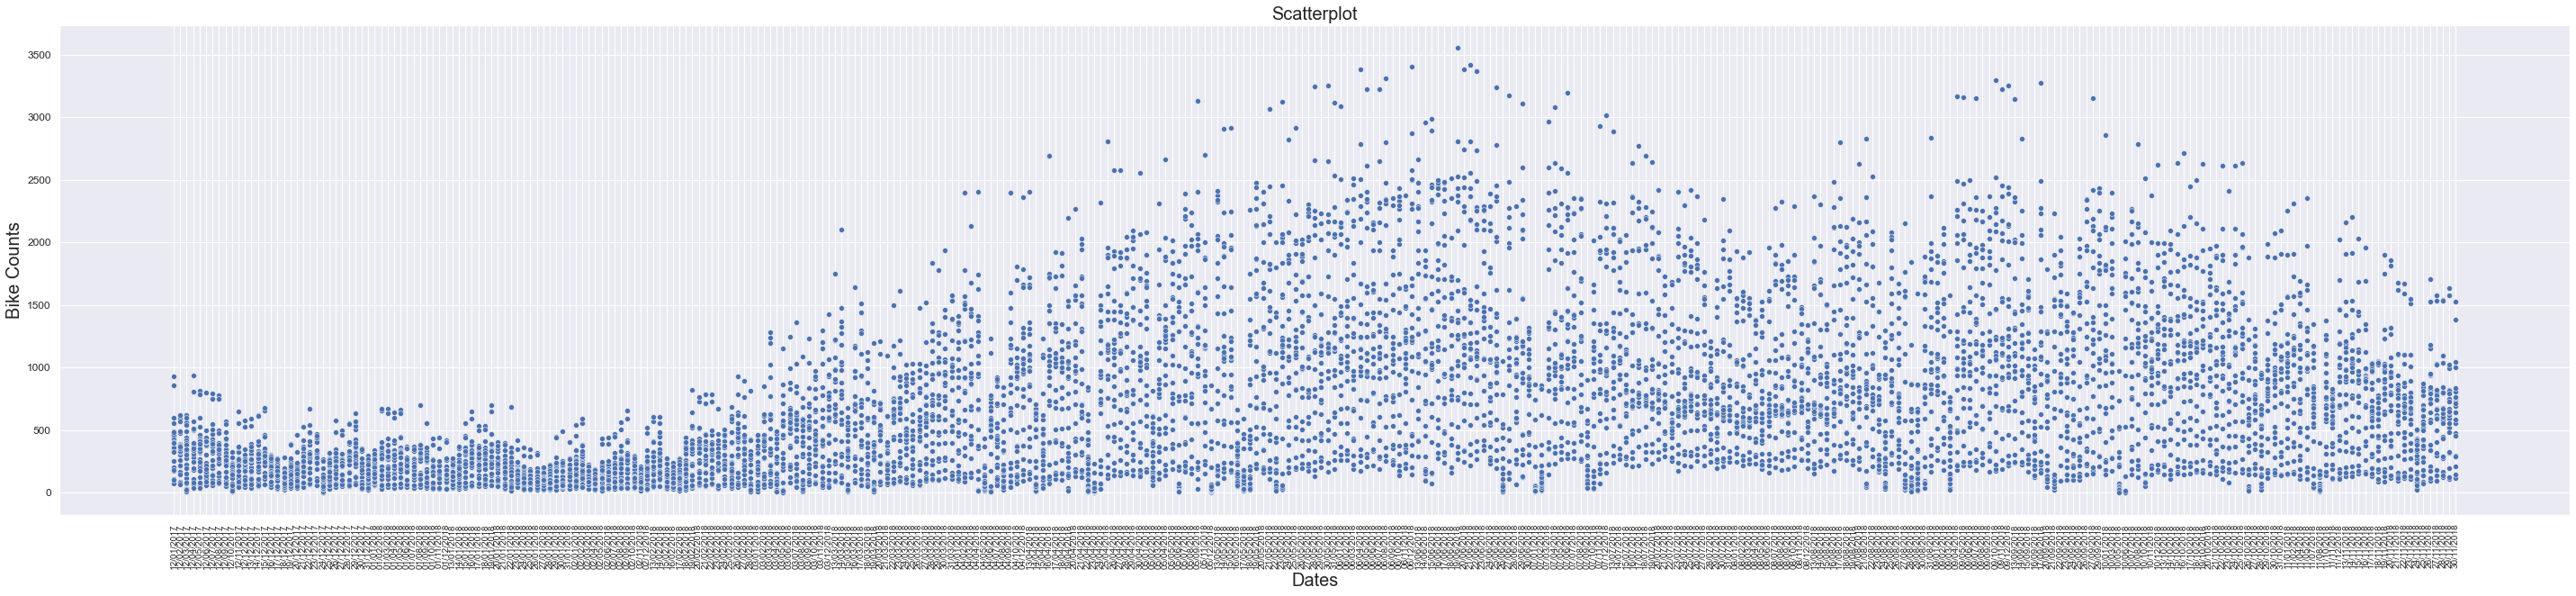

In [16]:
fig = plt.figure(figsize=(50,10))
sns.scatterplot(x=df.DATE,y=df.RENTED_BIKE_COUNT,data=df, estimator=None)
plt.title("Scatterplot", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("Bike Counts", fontsize=20)
plt.show()

### Ungraded Task: We can see some patterns emerging here.

Describe them and keep your findings for your presentation in the final project.


### Solution


#### Double Peaks (Bi-Modal) shape, May and September


### Using colour

Let's see if we can enhance some of these features by incorporating colour. Given our observations so far, `HOURS` is a great candidate for this task.

### Task 11 - Create the same plot of the `RENTED_BIKE_COUNT` time series, but now add `HOURS` as the colour.

### Solution 11


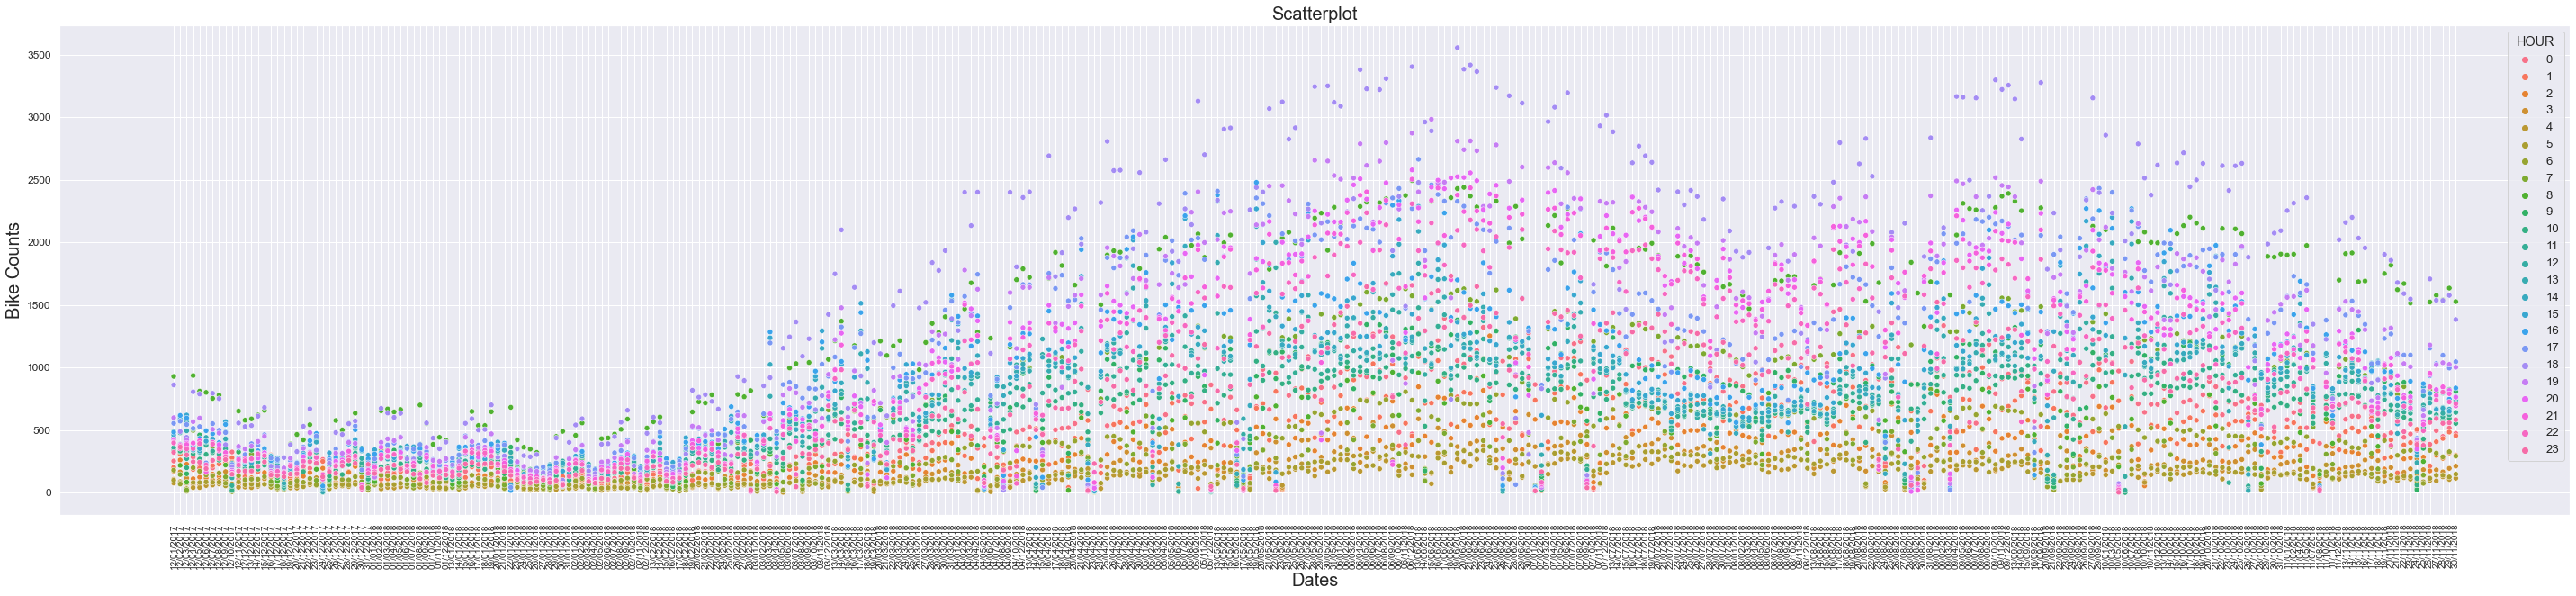

In [17]:
fig = plt.figure(figsize=(50,10))
sns.scatterplot(x=df.DATE,y=df.RENTED_BIKE_COUNT,data=df, hue=df.HOUR, estimator=None)
plt.title("Scatterplot", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("Bike Counts", fontsize=20)
plt.show()

### Ungraded Task: The trends are much more clear now.

Describe them and keep your findings for your presentation in the final project.


### Solution


#### Most bikes rented from 5pm to 6pm.


## Distributions


### Task 12 - Create a histogram overlaid with a kernel density curve

Normalize the histogram so the y axis represents 'density'. This can be done by setting `y=..density..` in the aesthetics of the histogram.


<details><summary>Click here for a hint</summary>
Set the colour to something like black and the fill to white so you can see the kernel density plot layer better.


<details><summary>Click here for another hint</summary>
Set the color and alpha such that your denstiy plot is clearly visible, without obscuring the histogram. 


### Solution 12


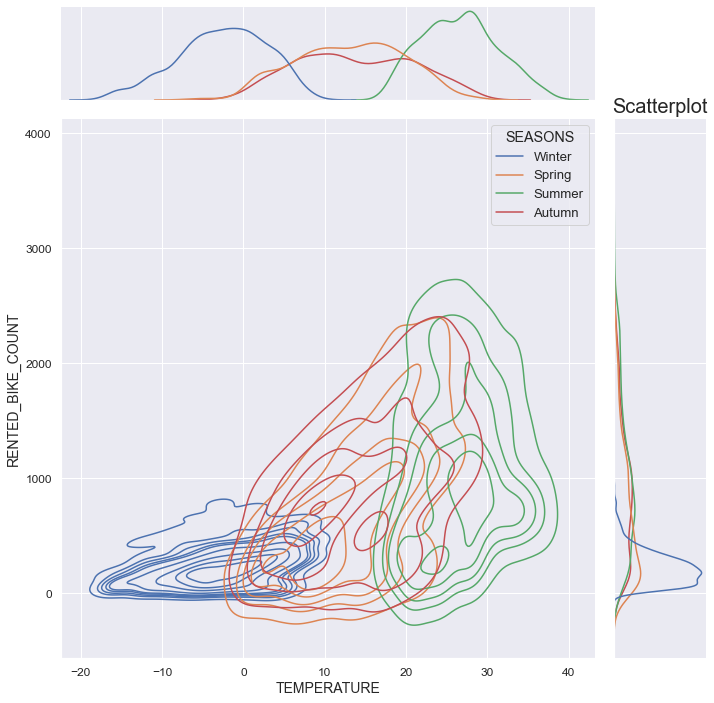

In [18]:
sns.jointplot(x=df.TEMPERATURE,y=df.RENTED_BIKE_COUNT,data=df, hue=df.SEASONS, estimator=None, kind='kde', height=10)
plt.title("Scatterplot", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Bike Counts", fontsize=20)
plt.show()

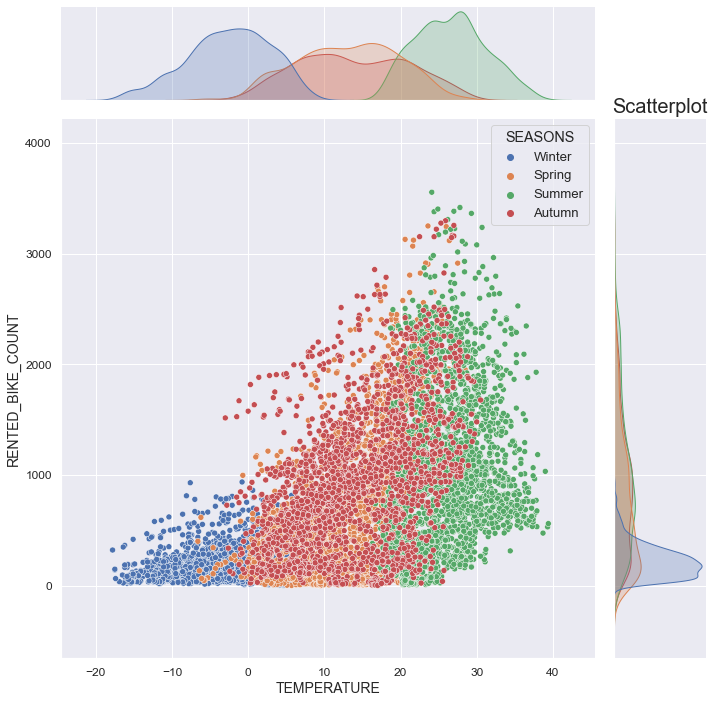

In [19]:

sns.jointplot(x=df.TEMPERATURE,y=df.RENTED_BIKE_COUNT,data=df, hue=df.SEASONS, estimator=None, kind='scatter', height=10)
plt.title("Scatterplot", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Bike Counts", fontsize=20)
plt.show()

### Ungraded Task: Describe the main features you see in your plot.

Consider what it's shape tells you, and keep your findings for your presentation in the final project.


<details><summary>Click here for a solution</summary>

We can see from the histogram that most of the time there are relatively few bikes rented. Indeed, the 'mode', or most frequent amount of bikes rented, is about 250.

Judging by the 'bumps' at about 700, 900, and 1900, and 3200 bikes, it looks like there may be other modes hiding within subgroups of the data.

Interestingly, judging from the tail of the distribution, on rare occasions there are many more bikes rented out than usual.


## Correlation between two variables (scatter plot)

### Task 13 - Use a scatter plot to visualize the correlation between `RENTED_BIKE_COUNT` and `TEMPERATURE` by `SEASONS`.

Start with `RENTED_BIKE_COUNT` vs. `TEMPERATURE`, then generate four plots corresponding to the `SEASONS` by adding a `facet_wrap()` layer.
Also, make use of colour and opacity to emphasize any patterns that emerge. Use `HOUR` as the color.

### Solution 13


In [20]:
df.columns

Index(['DATE', 'RENTED_BIKE_COUNT', 'HOUR', 'TEMPERATURE', 'HUMIDITY', 'WIND_SPEED', 'VISIBILITY', 'DEW_POINT_TEMPERATURE', 'SOLAR_RADIATION', 'RAINFALL', 'SNOWFALL', 'SEASONS', 'HOLIDAY', 'FUNCTIONING_DAY'], dtype='object')

<Figure size 1440x1440 with 0 Axes>

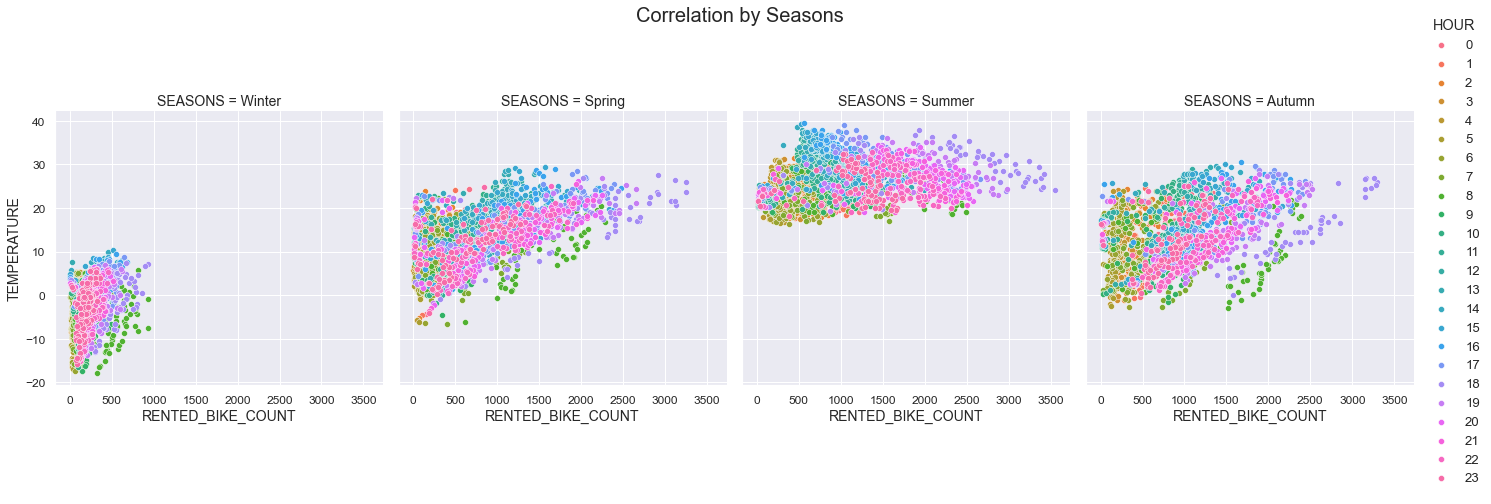

In [21]:
plt.figure(figsize=(20,20))


g = sns.FacetGrid(data=df, col="SEASONS", height=5, aspect=1, hue="HOUR")
g.map(sns.scatterplot, "RENTED_BIKE_COUNT", "TEMPERATURE")
g.add_legend()
plt.suptitle('Correlation by Seasons', x=0.5, y=1.2, ha='center', fontsize=20)

plt.show()

### Ungraded Task: Describe the patterns you see.

What do these patterns imply about the relationships between these variables? Keep your findings for your presentation in the final project.


<details><summary>Click here for a solution</summary>

Visually, we can see some strong correlations as approximately linear patterns.


Comparing this plot to the same plot below, but without grouping by `SEASONS`, shows how important seasonality is in explaining bike rental counts.


In [22]:
# ggplot(seoul_bike_sharing) +
#    geom_point(aes(x=TEMPERATURE,y=RENTED_BIKE_COUNT,colour=HOUR),alpha=1/5)

## Outliers (boxplot)

### Task 14 - Create a display of four boxplots of `RENTED_BIKE_COUNT` vs. `HOUR` grouped by `SEASONS`.

Use `facet_wrap` to generate four plots corresponding to the seasons.

### Solution 14


<Figure size 1440x1440 with 0 Axes>

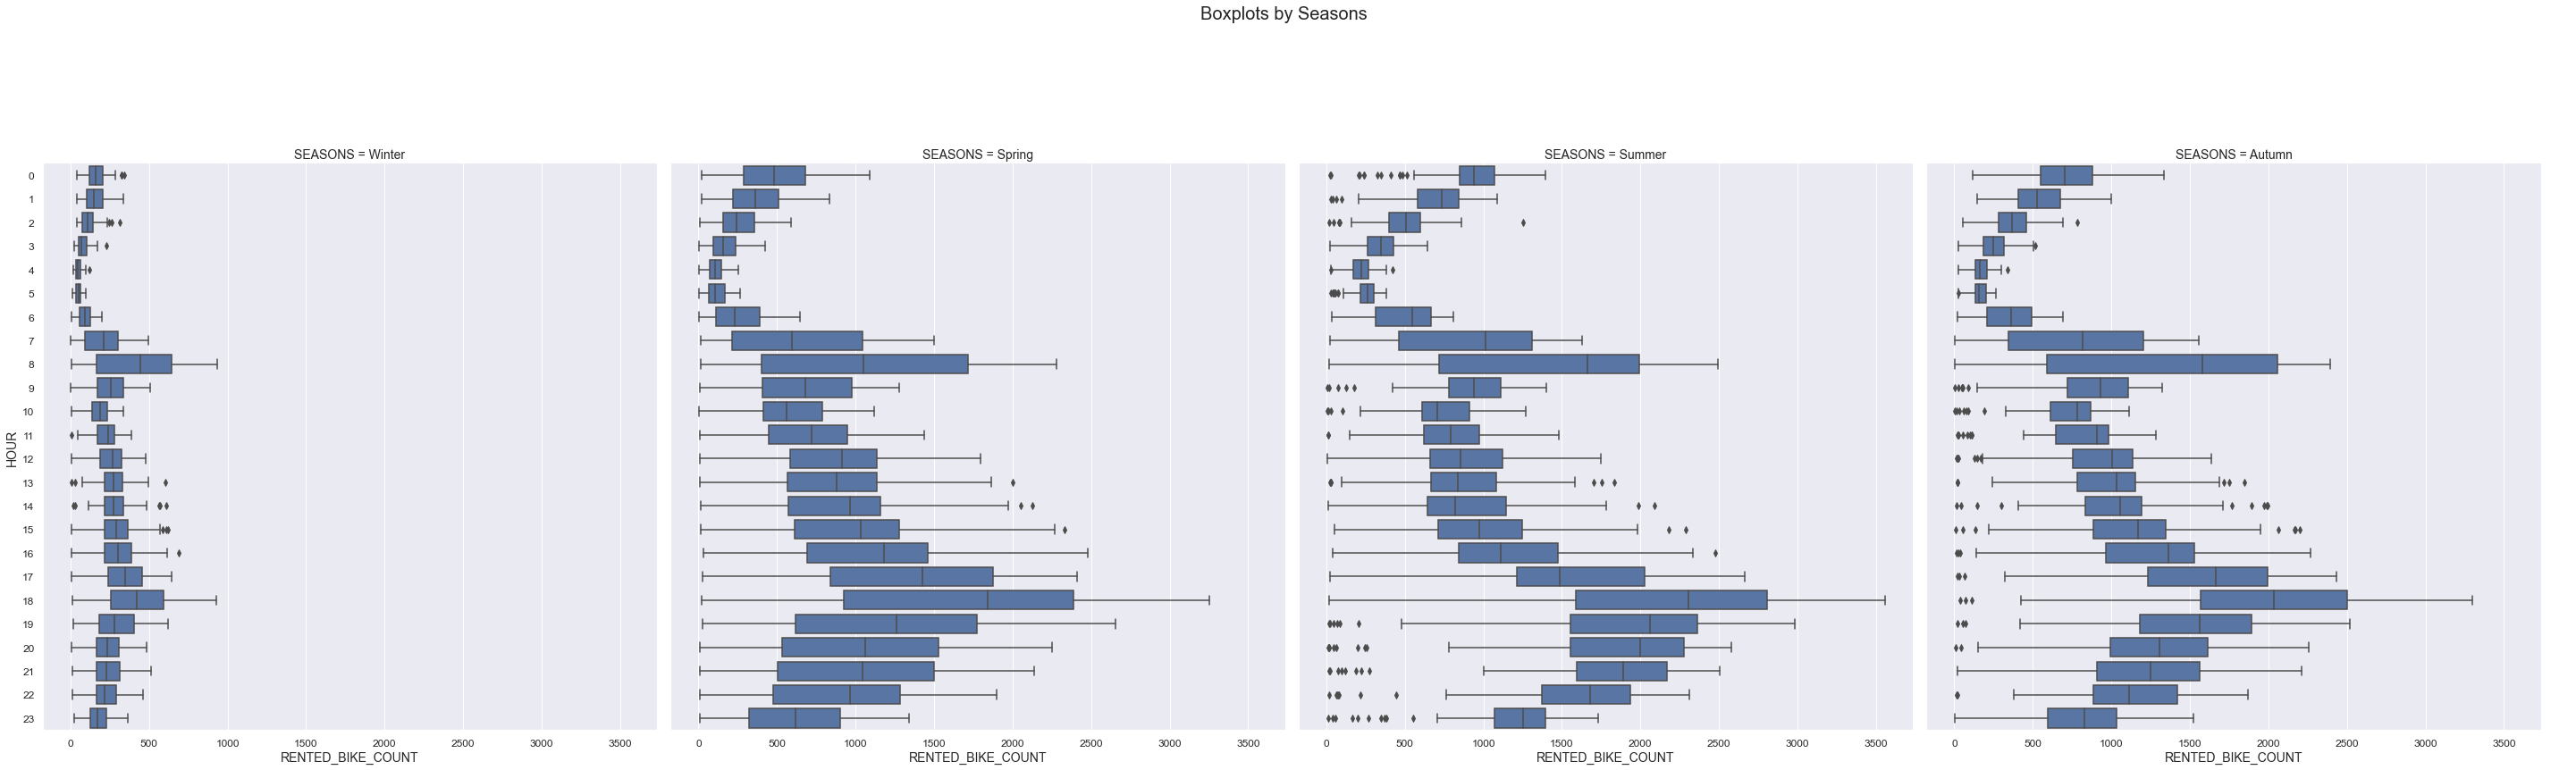

In [23]:
plt.figure(figsize=(20,20))


g = sns.FacetGrid(data=df, col="SEASONS", height=10, aspect=1)
g.map(sns.boxplot, "RENTED_BIKE_COUNT", "HOUR")
g.add_legend()
plt.suptitle('Boxplots by Seasons', x=0.5, y=1.2, ha='center', fontsize=20)

plt.show()


### Ungraded Task: Compare and contrast the key features of these boxplots between seasons.

At this point, a story should be taking shape. Again, keep your findings for your presentation in the final project.


<details><summary>Click here for a solution</summary>

Although the overall scale of bike rental counts changes with the seasons, key features remain very similar.\
For example, peak demand times are the same across all seasons, at 8 am and 6 pm.


### Task 15 - Group the data by `DATE`, and use the summarize() function to calculate the daily total rainfall and snowfall.

Also, go ahead and plot the results if you wish.

### Solution 15


In [24]:
df.groupby("DATE")[["RAINFALL","SNOWFALL"]].sum()

,RAINFALL,SNOWFALL
DATE,,
01/01/2018,0.00,0.00
01/02/2018,0.00,0.00
01/03/2018,0.00,0.00
01/04/2018,0.00,0.00
01/05/2018,0.00,0.00
...,...,...
31/05/2018,0.00,0.00
31/07/2018,0.00,0.00
31/08/2018,0.10,0.00


### Task 16 - Determine how many days had snowfall.

### Solution 16


In [25]:
df[df["SNOWFALL"] > 0.00]

,DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
120,12/06/2017,145,0,-2.80,77,0.00,331,-6.20,0.00,0.10,0.10,Winter,No Holiday,Yes
121,12/06/2017,144,1,-3.00,79,0.00,293,-6.10,0.00,0.00,0.30,Winter,No Holiday,Yes
122,12/06/2017,117,2,-3.00,79,0.00,1862,-6.10,0.00,0.00,0.40,Winter,No Holiday,Yes
123,12/06/2017,78,3,-3.20,78,0.00,1808,-6.40,0.00,0.20,0.40,Winter,No Holiday,Yes
124,12/06/2017,58,4,-3.40,75,0.00,1982,-7.20,0.00,0.00,0.40,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,26/11/2018,115,5,2.10,88,1.40,323,0.30,0.00,0.00,0.30,Autumn,No Holiday,Yes
8351,26/11/2018,339,6,1.80,88,1.10,313,0.00,0.00,0.00,0.30,Autumn,No Holiday,Yes
8352,26/11/2018,819,7,1.70,89,1.30,295,0.00,0.00,0.00,0.30,Autumn,No Holiday,Yes
8353,26/11/2018,1524,8,2.00,84,1.10,396,-0.40,0.03,0.00,0.30,Autumn,No Holiday,Yes


There are many more visualizations we could have chosen to cover here, but the important thing was that you deepen your understanding of the dataset.\
I hope we succeeded in that endeavour!

(Keep going, you are getting closer to the finish line with each step you take. :-) )


## Further Reading

\[1] 'Causal Model' (2021) *Wikipedia*. Available at "https://en.wikipedia.org/wiki/Causal_model" (Accessed: 22 April 2021).


## Author(s)

<h4> Jeff Grossman </h4>

## Contributor(s)

<h4> Yan Luo, Rav Ahuja </h4>

## Change log

| Date       | Version | Changed by    | Change Description                                                                                          |
| ---------- | ------- | ------------- | ----------------------------------------------------------------------------------------------------------- |
| 2021-05-04 | 0.4     | Jeff Grossman | Remove solutions                                                                                           |
| 2021-04-23 | 0.3     | Jeff Grossman | Update per review                                                                                           |
| 2021-04-20 | 0.2     | Jeff Grossman | Push for peer review                                                                                           |
| 2021-04-05 | 0.1     | Jeff Grossman | Start content creation                                                                                    |

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
